### SBERT model training part

In [1]:
import pandas as pd
import numpy as np
from sentence_transformers import InputExample, SentenceTransformer, models, losses, evaluation, util
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
from data_processing import get_data

### load data

In [2]:
x_train, x_test1, x_test2, x_test3, x_test4, x_test5, y_train, y_test1, y_test2, y_test3, y_test4, y_test5 = get_data()

In [3]:
print('the length of training set is',len(x_train))
print('the length of each testing set is',len(x_test1))

the length of training set is 20214
the length of each testing set is 76815


Text(0, 0.5, 'number')

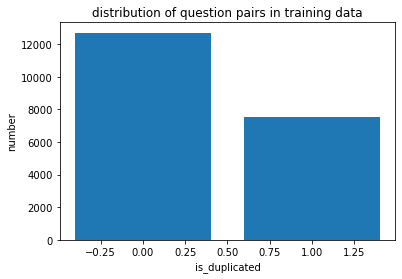

In [4]:
# plot the distribution of the training data
y1 = sum(float(i) for i in y_train)
y0 = len(x_train)-y1
plt.bar([0,1],[y0,y1])
plt.title('distribution of question pairs in training data')
plt.xlabel('is_duplicated')
plt.ylabel('number')

Text(0, 0.5, 'number')

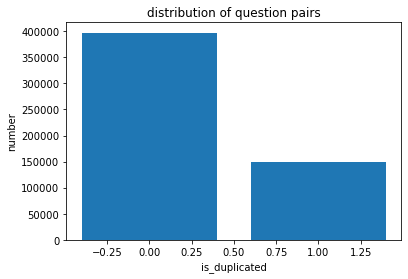

In [5]:
# plot the distribution of all the data
y1_all = sum(float(i) for i in y_train)+sum(float(i) for i in y_test1)+sum(float(i) for i in y_test2)+sum(float(i) for i in y_test3)+sum(float(i) for i in y_test4)+sum(float(i) for i in y_test5)
y0_all = len(x_train)+len(x_test1)*5-y1
plt.bar([0,1],[y0_all,y1_all])
plt.title('distribution of question pairs')
plt.xlabel('is_duplicated')
plt.ylabel('number')

In [6]:
# to convinient the training process, change the structure of data
def convert_list_data_into_InputExample(x, y):
    examples = []
    for s, label in zip(x, y):
        question1, question2 = s
        examples.append(InputExample(texts=[question1, question2], label=float(label)))
    return examples

In [7]:
train = convert_list_data_into_InputExample(x_train, y_train)
test1 = convert_list_data_into_InputExample(x_test1, y_test1)
test2 = convert_list_data_into_InputExample(x_test2, y_test2)
test3 = convert_list_data_into_InputExample(x_test3, y_test3)
test4 = convert_list_data_into_InputExample(x_test4, y_test4)
test5 = convert_list_data_into_InputExample(x_test5, y_test5)

### train the SBERT model

In [8]:
# SBERT model
word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(),
                           out_features=256, activation_function=nn.Tanh())
model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
train_loader = DataLoader(train, shuffle=True, batch_size=64)
train_loss = losses.CosineSimilarityLoss(model)
evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(test1)
model_save_path = 'C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/2022 Fall/NLP/model/'

In [12]:
model.fit(train_objectives=[(train_loader, train_loss)],
          epochs=1,
          evaluator=evaluator,
          warmup_steps=100,
          save_best_model=True,
          output_path=model_save_path,)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/316 [00:00<?, ?it/s]

RuntimeError: [enforce fail at C:\cb\pytorch_1000000000000\work\c10\core\impl\alloc_cpu.cpp:81] data. DefaultCPUAllocator: not enough memory: you tried to allocate 73138176 bytes.